## Trabajo No. 4

### Sobre: Regresión Logística
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

In [235]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [236]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [237]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [238]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [239]:
def loss(y, a):
#   for i in range(len(a)):
#       if((1 - a[0][i]) <= 1):
#            a[0][i] = 0.99
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [240]:
def cost(logloss):
    return np.mean(logloss)

In [241]:
def score(YP, Y):
    K = Y - YP
    j = 0
    for i in range(len(K[0])):
        if(K[0][i] != 0):
            j +=1
    return (100-(j*100)/len(K[0]))

In [242]:
def y_preddict(Y_hat, Y):
    YP = np.round(Y_hat)
    K = Y - YP
    print("Efectividad de "+str(score(YP,Y))+"%")
    print("Error de "+str(mean_squared_error(Y, YP)*100)+"%")

### Lectura del dataset

In [268]:
dataset = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [269]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [270]:
#Vemos que la columna TotalCharges tiene 11 elementos, que les faltan datos
dataset[dataset.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [271]:
#Eliminamos esas filas de los valores vacios
dataset = dataset[dataset.TotalCharges != ' ']
dataset.shape
#Nuestro dataset quedo sin valore en blanco o nulos

(7032, 21)

In [272]:
#Unificamos nuestro dataset, vemos que elvalor de 'No internet service', de la columnas “OnlineSecurity”, “OnlineBackup”, “DeviceProtection”, “TechSupport”, “streamingTV”, “streamingMovies”
#se pueden reemplazar por "No"

cols_recode = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in cols_recode:
    dataset[i].replace('No internet service','No', inplace=True)

#Con esta linea en la columna 'MultipleLines' el valor 'No phone service', se puede cambiar por el valor 'No'
dataset['MultipleLines'].replace('No phone service','No', inplace=True)

#Aca la columna 'SeniorCitizen' la cambiamos 1 y 0 por 'Si' y 'No', respectivamente
dataset['SeniorCitizen'].replace(0,'No', inplace=True)
dataset['SeniorCitizen'].replace(1,'Si', inplace=True)
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,No,10,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [248]:
#Removemos las columnas que no necesitamos para el analisis del dataset 'customerID' y 'tenure'
dataset = dataset.drop("customerID", axis=1)
dataset = dataset.drop("tenure", axis=1)
dataset

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,No,No,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Correlación entre variables numéricas

In [249]:
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)
dTemp = dataset[['MonthlyCharges','TotalCharges']]
dTemp.corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


In [250]:
#Los cargos mensuales (MonthlyCharges) y los cargos totales (TotalCharges) están correlacionados, segun vemos en el paso anterior.
#Así que uno de ellos será eliminado del modelo. Eliminamos los Cargos Totales (TotalCharges).
dataset = dataset.drop("TotalCharges", axis=1)
dataset

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
5,Female,No,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes
6,Male,No,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,No
7,Female,No,No,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,No
8,Female,No,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes
9,Male,No,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,No


### Transformamos el dataset

In [251]:
encode = LabelEncoder()
for column in dataset.columns:
    if(column != "MonthlyCharges"):
        dataset[column] = encode.fit_transform(dataset[column].values)
dataset['MonthlyCharges'] = dataset['MonthlyCharges']*0.1
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].round(0)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,3.0,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,3,6.0,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,3,5.0,1
3,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,4.0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,7.0,1


In [252]:
for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,1.0


In [253]:
#seed = 2
#np.random.seed(seed)
#X = np.random.rand(10,5)##matriz de 10 x 5 donde 10 son las feactures
def logistic_regresion(learning_rate, epochs, num_cost_mod, x, y):
    #X = x_train.T
    #Y = np.array([y_train])
    X = x.T
    Y = np.array([y])
    m = X.shape[1]

    W = np.random.randn(arr_X[0].shape[0],1)#Matriz de 10 x 1 donde 10 son las feactures random
    b = 0.1

    #print("m: ", m)
    #print("W inicial: ",W)
    #print("b inicial: ",b)

    #learning_rate = 0.2
    cost_list = []

    for i in range(epochs): #1000 iteraciones del descenso del gradiente
        '''
        Activacion hacia adelante
        '''
        Z = linear_activation(W,b,X)
        A = sigmoid(Z)

        '''
        Activacion hacia atras - retropropagacion del error
        '''
        dz = A - Y
        dW = np.dot(X,dz.T) / m
        db = np.sum(dz) / m

        '''
        Actualizacion de parametros mediante descenso del gradiente
        '''        
        W -= learning_rate * dW
        b -= learning_rate * db

        J = cost(loss(Y,A))

        if(i%num_cost_mod == 0):
            cost_list.append(J)
            #print(A)
            #print(Y)
            #print("costo: ", J)

    #print("W actualizado: ",W)
    #print("b actualizado: ",b)
    print("costo (error) final despues de "+str(epochs)+" iteraciones es: ", J)

    plt.plot(cost_list)
    plt.show()

    return {'W':W, 'b':b, 'X':X, 'Y':Y}

In [254]:
arr_X = np.array(dataset.drop(['Churn'],1))
arr_Y = np.array(dataset['Churn'])

In [255]:
x_train, x_test, y_train, y_test = train_test_split(arr_X, arr_Y, test_size=0.3)
print x_train

[[ 1.  0.  1. ...  1.  1. 11.]
 [ 0.  0.  1. ...  0.  0.  7.]
 [ 1.  1.  1. ...  1.  1.  9.]
 ...
 [ 0.  0.  0. ...  1.  0.  8.]
 [ 0.  0.  0. ...  0.  1. 10.]
 [ 0.  0.  1. ...  0.  0. 10.]]


### 1. Pruebas con el numero de epocas y el learning rate cambiantes

-------------------------------------------------------------------------------
('costo (error) final despues de 1000 iteraciones es: ', 0.46165690868833736)


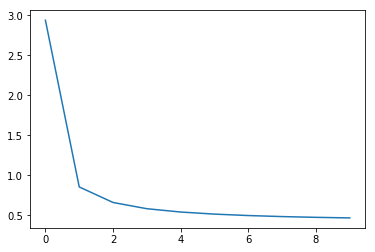

Learning rate = 0.05
Epochs = 1000
Efectividad de 77%
Error de 23.20195042665583%
-------------------------------------------------------------------------------
('costo (error) final despues de 2000 iteraciones es: ', 0.4357231559048148)


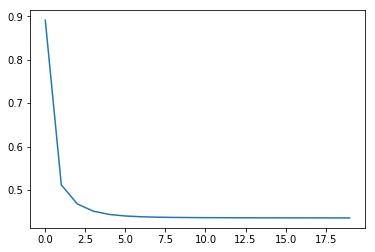

Learning rate = 0.15
Epochs = 2000
Efectividad de 79%
Error de 21.678179601787892%
-------------------------------------------------------------------------------
('costo (error) final despues de 3000 iteraciones es: ', 0.5172783127132559)


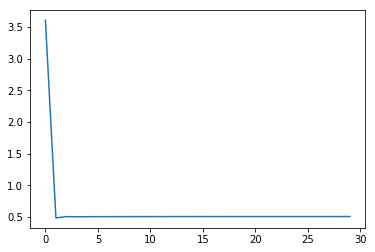

Learning rate = 0.25
Epochs = 3000
Efectividad de 75%
Error de 25.21332791548151%
-------------------------------------------------------------------------------
('costo (error) final despues de 4000 iteraciones es: ', 0.7668901094603677)


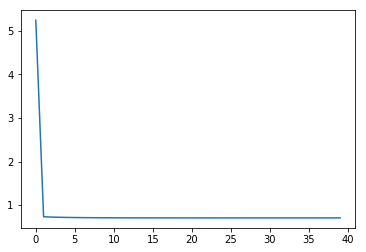

Learning rate = 0.35
Epochs = 4000
Efectividad de 71%
Error de 29.500203169443317%
-------------------------------------------------------------------------------
('costo (error) final despues de 5000 iteraciones es: ', 0.9079072532274983)


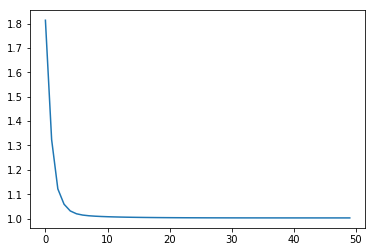

Learning rate = 0.45
Epochs = 5000
Efectividad de 74%
Error de 26.838683462007314%
-------------------------------------------------------------------------------
('costo (error) final despues de 6000 iteraciones es: ', 1.1129042421825237)


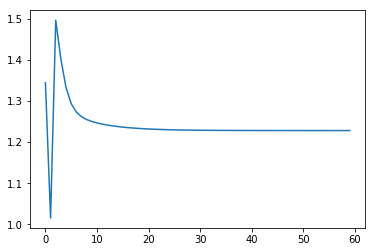

Learning rate = 0.55
Epochs = 6000
Efectividad de 74%
Error de 26.81836651767574%
-------------------------------------------------------------------------------
('costo (error) final despues de 7000 iteraciones es: ', 1.3215133891010746)


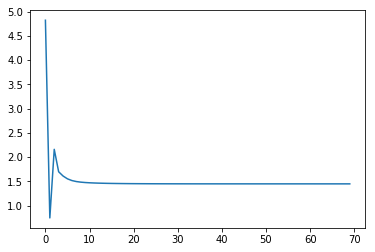

Learning rate = 0.65
Epochs = 7000
Efectividad de 74%
Error de 26.79804957334417%
-------------------------------------------------------------------------------
('costo (error) final despues de 8000 iteraciones es: ', 1.661331170438624)


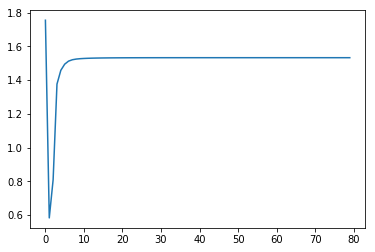

Learning rate = 0.75
Epochs = 8000
Efectividad de 69%
Error de 31.917919544900446%
-------------------------------------------------------------------------------
('costo (error) final despues de 9000 iteraciones es: ', 1.872774067394493)


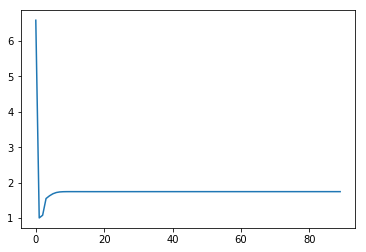

Learning rate = 0.85
Epochs = 9000
Efectividad de 68%
Error de 32.100772043884604%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 2.0820075071053346)


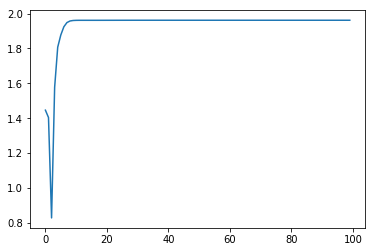

Learning rate = 0.95
Epochs = 10000
Efectividad de 68%
Error de 32.08045509955303%


In [256]:
#learning_rate = 0.05
learning_rate = 0.05
#modulo = 100
#epochs = 10000
modulo = 100
epochs = 1000
for i in range(10):    
    print '-------------------------------------------------------------------------------'
    #valores = logistic_regresion(learning_rate, epochs, modulo)
    valores = logistic_regresion(learning_rate, epochs, modulo, x_train, y_train)
    W = valores['W']
    b = valores['b']
    X = valores['X']
    Y = valores['Y']
    #Y_hat.np.append(predict(W,b,X), axis=0)
    Y_hat = predict(W,b,X)
    print 'Learning rate = ' + str(learning_rate)
    print 'Epochs = ' + str(epochs)
    y_preddict(Y_hat, Y)
    #learning_rate += 0.05
    learning_rate += 0.1
    epochs += 1000    
    #print("predicciones: ",np.round(Y_hat))
    #print("clases originales: ", Y)

### 2. Pruebas con el numero de epocas fijo y el learning rate cambiante

-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 0.43558558961716326)


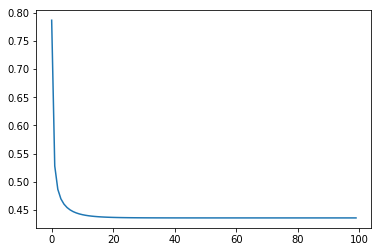

Learning rate = 0.1
Epochs = 10000
Efectividad de 79%
Error de 21.678179601787892%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 0.4355855823906395)


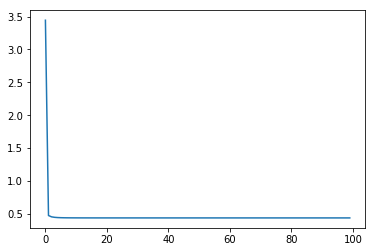

Learning rate = 0.2
Epochs = 10000
Efectividad de 79%
Error de 21.678179601787892%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 0.643762486907147)


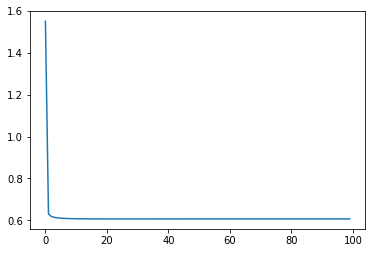

Learning rate = 0.3
Epochs = 10000
Efectividad de 72%
Error de 28.01706623323852%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 0.8862774372287274)


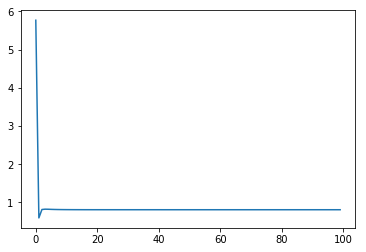

Learning rate = 0.4
Epochs = 10000
Efectividad de 70%
Error de 30.069077610727348%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 1.1162881889912954)


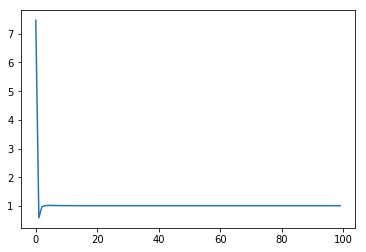

Learning rate = 0.5
Epochs = 10000
Efectividad de 70%
Error de 30.800487606663957%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 1.2168028583686497)


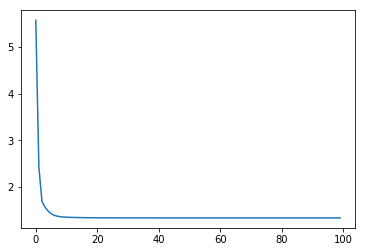

Learning rate = 0.6
Epochs = 10000
Efectividad de 74%
Error de 26.777732629012597%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 1.426932559393125)


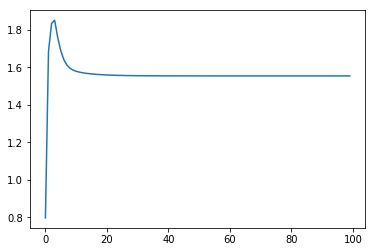

Learning rate = 0.7
Epochs = 10000
Efectividad de 74%
Error de 26.79804957334417%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 1.639501536519602)


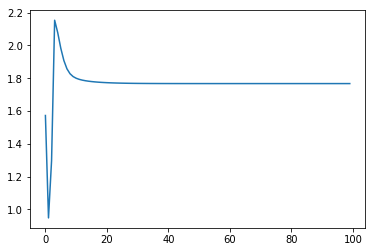

Learning rate = 0.8
Epochs = 10000
Efectividad de 74%
Error de 26.737098740349452%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 1.8539001926133531)


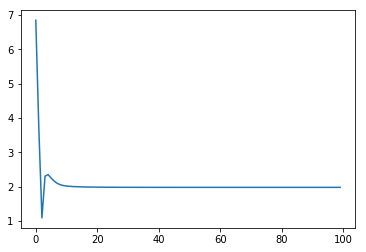

Learning rate = 0.9
Epochs = 10000
Efectividad de 74%
Error de 26.737098740349452%
-------------------------------------------------------------------------------
('costo (error) final despues de 10000 iteraciones es: ', 2.1859825213477375)


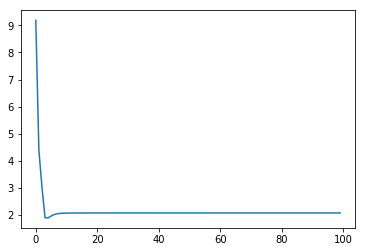

Learning rate = 1.0
Epochs = 10000
Efectividad de 68%
Error de 32.039821210889876%


In [257]:
learning_rate = 0.1
modulo = 100
epochs = 10000
for i in range(10):
    print '-------------------------------------------------------------------------------'    
    valores = logistic_regresion(learning_rate, epochs, modulo, x_train, y_train)
    W = valores['W']
    b = valores['b']
    X = valores['X']
    Y = valores['Y']
    Y_hat = predict(W,b,X)
    print 'Learning rate = ' + str(learning_rate)
    print 'Epochs = ' + str(epochs)
    y_preddict(Y_hat, Y)
    learning_rate += 0.1

('costo (error) final despues de 10000 iteraciones es: ', 0.42837408613198347)


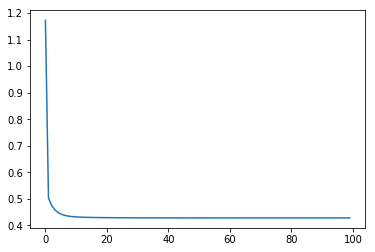

Learning rate = 0.1
Epochs = 10000
Efectividad de 79%
Error de 21.61137440758294%


In [258]:
learning_rate = 0.1
epochs = 10000
modulo = 100
valores = logistic_regresion(learning_rate, epochs, modulo, x_test, y_test)
W = valores['W']
b = valores['b']
X = valores['X']
Y = valores['Y']
#Y_hat.np.append(predict(W,b,X), axis=0)
Y_hat = predict(W,b,X)
print 'Learning rate = ' + str(learning_rate)
print 'Epochs = ' + str(epochs)
y_preddict(Y_hat, Y)

### Implementación de Regresión logística con sklearn

In [264]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score

arr_X = np.array(dataset.drop(['Churn'],1))
arr_Y = np.array(dataset['Churn'])

model = linear_model.LogisticRegression()
validation_size = 0.3
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(arr_X, arr_Y, test_size=validation_size)
X_train

model.fit(X_train,Y_train)

predictions = model.predict(X_validation)
print("Error medio cuadrado = "+str(mean_squared_error(Y_validation, predictions)) ) 

Error medio cuadrado = 0.2161137440758294


## Conclusiones

Se realizaron algunas pruebas con el modelo, como por ejemplo cambiando el numero de epocas y el learning rate
y poniendo un numero de epocas fijo (10000 para este caso), y con el learning rate camiante.

Se puede concluir en base a las primeras pruebas: 
- A medida que el numero de epocas va siendo mayor y el learning rate es alto, el costo (error) es mucho mayor, y si el número de epocas es mas bajo y el learning rate también, el costo(error) es mucho menor. 
- Vale aclarar que cuando el número de epocas del modelo es muy pequeño pues no vamos a tener margen para dar una conclusión mas veridica del costo(error).
- También podemos ver que la gráfica del error es mucho mas variada e inestable.

De las segundas pruebas, con el número de epocas fijas (10000) se puede concluir:
- Que a medida que el learning rate se va auentando el error va aumentando y su gráfica se ve cambiando de manera considerable ya que no son valores que aumentan secuencialmente sino que aumentan de manera aleatoria, es decir, unas veces alto y otras bajo.

En conclusión implementando el algoritmo de regresión logística con sklearn y la implementación de nuestro modelo de regresión logística, asignandole a nuestro algoritmo un learning rate y un número de epocas adecuado, se puede observar que obtenemos en ambos un error medio cuadrado muy similar.

Como conclusión general tenemos que para que nuestro modelo nos de un resultado mas real y confiable, debemos encontrar un learning rate que no sea ni muy alto ni muy bajo, ya que si lo ponemos muy bajo no llegaremos a un punto confiable y si lo ponemos muy alto, nos encontraremos con un error variado y poco confiable.